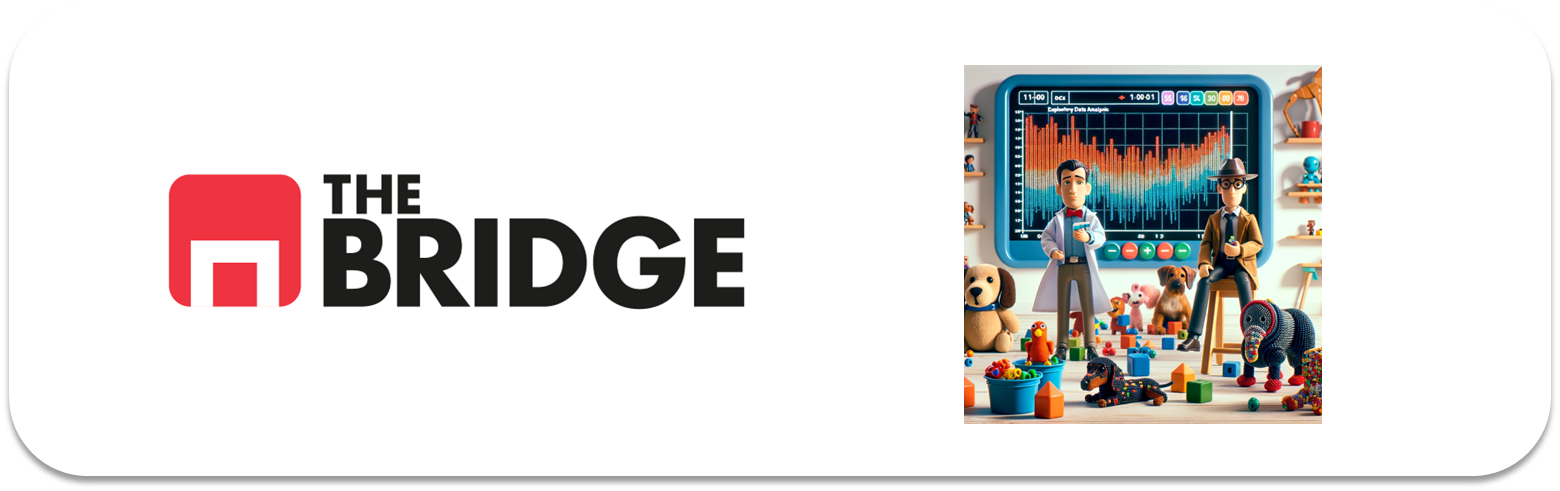

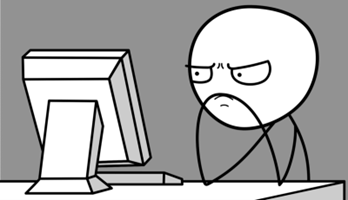

Para ejercitarte y afianzar lo aprendido sobre el estudio estadístico de las relaciones entre variables, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [42]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship
from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [43]:
df = pd.read_csv("./data/admission_data.csv")
df.drop(columns=["Unnamed: 0", "Year"], inplace=True)
df

,Major,Gender,Admission
0,School of Medicine,F,Rejected
1,Department of Economics,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected
...,...,...,...
12758,Other,M,Accepted
12759,Department of Mechanical Engineering,M,Accepted
12760,Other,F,Rejected
12761,Other,M,Rejected


### Ejercicio 2

Si recuerdas, las variables "Admission" y "Major" parecían tener una relación clara (la distribución de ratio de admisión variaba claramente entre departamentos o "Majors"). Utiliza el estadístico adecuado (para variables categóricas entre sí, Chi-2) para comprobar que esa hipótesis de relación es estadísticamente significativa, tal y como lo hemos hecho en el workout

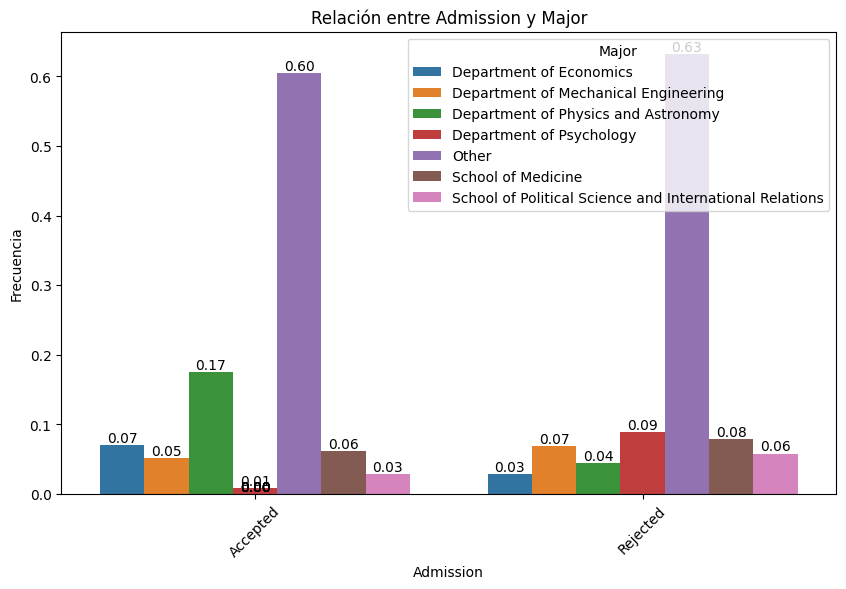

In [44]:
plot_categorical_relationship_fin(df, "Admission", "Major", relative_freq=1, show_values=1)

In [45]:
tabla_contingencia = pd.crosstab(df["Admission"], df["Major"])
tabla_contingencia

Major,Department of Economics,Department of Mechanical Engineering,Department of Physics and Astronomy,Department of Psychology,Other,School of Medicine,School of Political Science and International Relations
Admission,,,,,,,
Accepted,370,269,914,47,3164,321,147
Rejected,215,523,332,667,4760,597,437


In [46]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1102.860844398216
P-Value: 5.0157639171790306e-235
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[ 239.81195644  324.66849487  510.77897046  292.69356734 3248.32468855
   376.32030087  239.40202147]
 [ 345.18804356  467.33150513  735.22102954  421.30643266 4675.67531145
   541.67969913  344.59797853]]


refuerza la hipotesis de dependencia

### Ejercicio 3

Repite el ejercicio anterior para las variables "Admission" y "Gender".

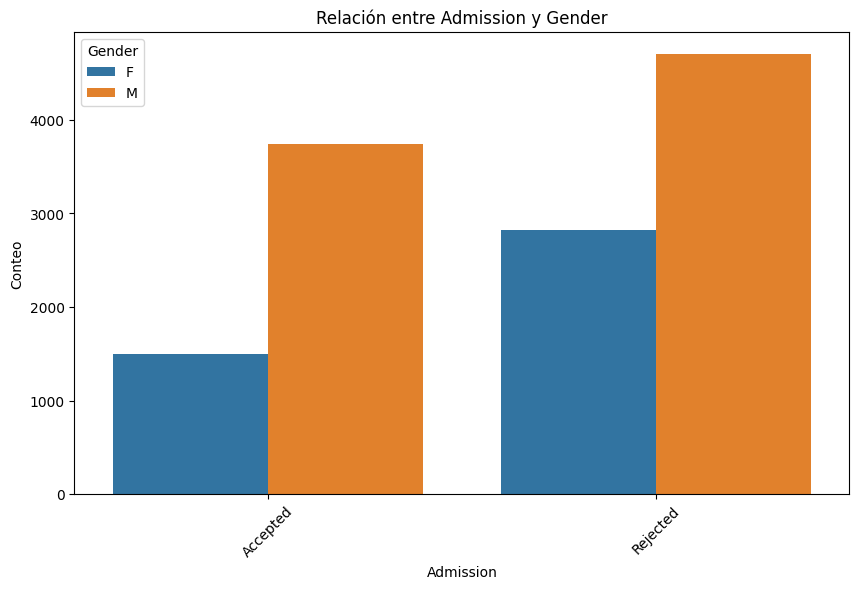

In [47]:
plot_categorical_relationship_fin(df, "Admission", "Gender")

In [48]:
tabla_contingencia = pd.crosstab(df["Admission"], df["Gender"])
tabla_contingencia

Gender,F,M
Admission,,
Accepted,1494,3738
Rejected,2827,4704


In [49]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 110.84892145390278
P-Value: 6.385628329926473e-26
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[1771.32899788 3460.67100212]
 [2549.67100212 4981.32899788]]


dependencia

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [58]:
df = pd.read_csv("./data/tips.csv", index_col=0)
df["size"].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

### Ejercicio 5

Comprueba si la hipótesis "No existe una relación entre la propina dejada y el sexo del cliente" tiene confirmación estadística significativa. Para ello emplea el test que creas conveniente a la relación entre las variables "tip" y "sex"(recuerda que aquí disponemos de tres test: t-student, prueba U de Mann-Whitney u el análisis ANOVA).

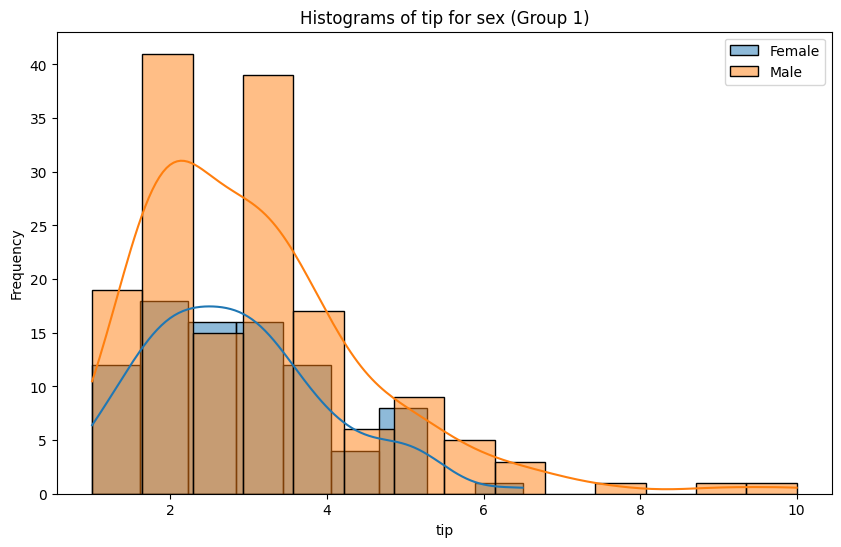

In [51]:
plot_grouped_histograms(df, "sex", "tip", group_size=2)

In [55]:
grupo_a = df.loc[df["sex"] == "Female"]["tip"]
grupo_b = df.loc[df["sex"] == "Male"]["tip"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 6369.5
Valor p: 0.38335449359363927


no hay diferencia estadistica significativa

### Ejercicio 6

Repite el ejercicio anterior para "tip" y "size" considerando esta última como "categórica". Haz el analisis bivariante visual previo.

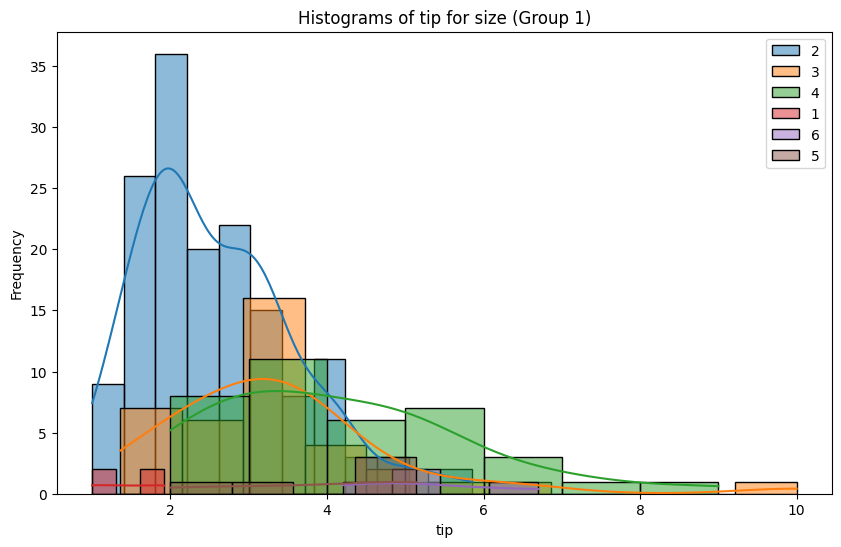

In [62]:
plot_grouped_histograms(df, "size", "tip", group_size=6)

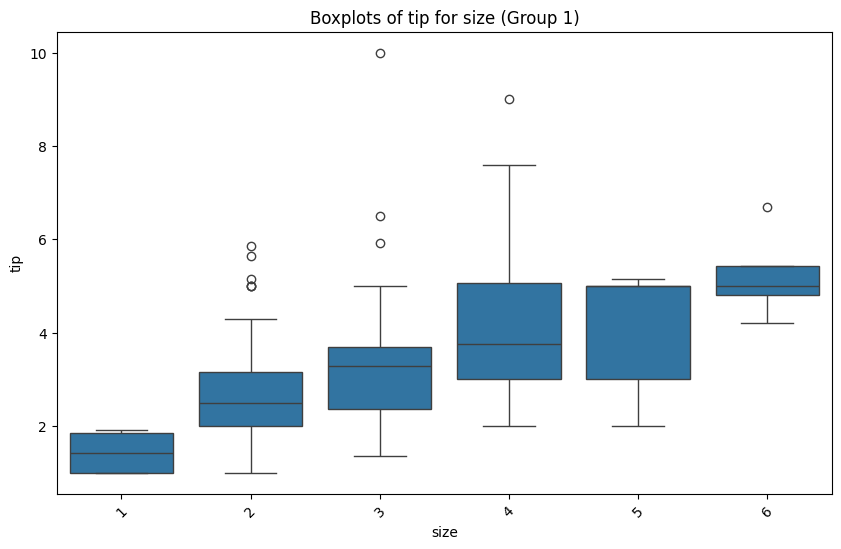

In [64]:
plot_grouped_boxplots(df.sort_values("size"), "size", "tip", 6)

In [66]:
grupos = df["size"].unique()
tips_por_tam = []
for grupo in grupos:
    tips_del_grupo = df[df["size"]==grupo]["tip"]
    tips_por_tam.append(tips_del_grupo)

tips_por_tam

[0      1.01
 3      3.31
 6      2.00
 8      1.96
 9      3.23
        ... 
 237    1.17
 240    2.00
 241    2.00
 242    1.75
 243    3.00
 Name: tip, Length: 156, dtype: float64,
 1       1.66
 2       3.50
 16      1.67
 17      3.71
 18      3.50
 19      3.35
 35      3.60
 36      2.00
 37      3.07
 38      2.31
 39      5.00
 40      2.24
 48      2.05
 64      2.64
 65      3.15
 71      3.00
 102     2.50
 112     4.00
 114     4.00
 129     2.18
 146     1.36
 152     2.74
 162     2.00
 165     3.48
 170    10.00
 182     3.50
 186     3.50
 188     3.50
 189     4.00
 200     4.00
 205     3.23
 206     3.41
 210     2.00
 214     6.50
 223     3.00
 231     3.00
 238     4.67
 239     5.92
 Name: tip, dtype: float64,
 4      3.61
 5      4.71
 7      3.12
 11     5.00
 13     3.00
 23     7.58
 25     2.34
 31     2.50
 33     2.45
 44     5.60
 47     6.00
 52     5.20
 54     4.34
 56     3.00
 59     6.73
 63     3.76
 77     4.00
 85     5.17
 95     4.73
 116    5

In [69]:

f_val, p_val = f_oneway(*tips_por_tam)
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 15.746330672727057
Valor p: 2.1694633916208874e-13


rechazamos la hipotesis nula y si hay relacion positiva

### Ejercicio 7

Considera ahora "size" como numérica, muestra el diagrama de dispersión con correlación entre "size" y "tip" y luego aplicales el test para saber si el coeficiente de pearson es estadísticamente significativo. ¿Qué más observas?

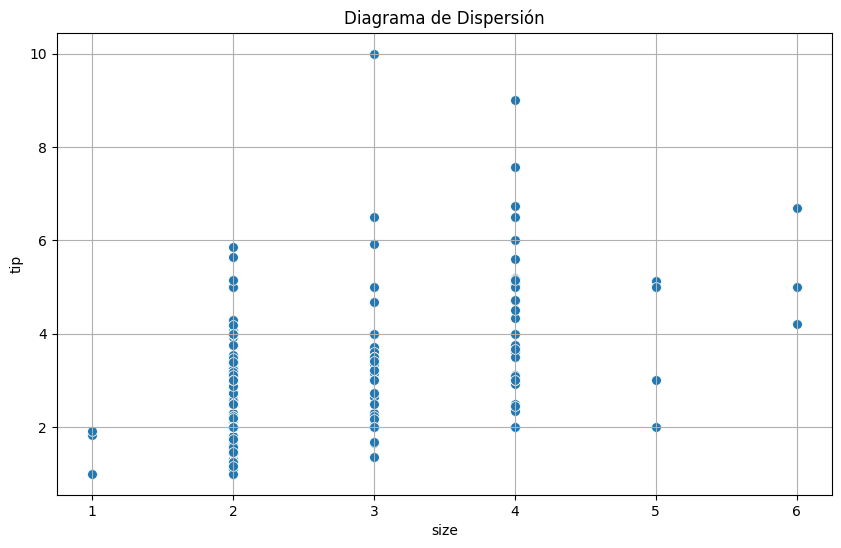

In [70]:
grafico_dispersion_con_correlacion(df, "size", "tip")

In [72]:
pearsonr(df["size"], df["tip"])

PearsonRResult(statistic=0.4892987752303571, pvalue=4.300543327225138e-16)